## Load data from files

### Load data using pandas
Check notes on pandas for more data loading with pandas. 

In [ ]:
import pandas as pd
file = 'digits.csv'
data = pd.read_csv(file,nrows = 5, header = None) #choose the number of rows to read in
data_array = np.array(data.values)

In [ ]:
file = 'titanic_corrupt.txt'
data = pd.read_csv(file, sep='\t', comment='#', na_values='Nothing') #specify NA values in doc

In [ ]:
import pandas as pd
file = 'battledeath.xlsx'
xl = pd.ExcelFile(file)
print(xl.sheet_names) 
#There is an underscore between sheet and names.

### Flat file and xlsx file 
* Flat file is text file containing records (table). flat file usually has the types of .txt, csv. etc.
* xlsx file is not a flat file because it is a spreadsheet consisting of many sheets, not a single table. 
* There are a number of datatypes that cannot be saved easily to flat files, such as lists and dictionaries. If you want your files to be human readable, you may want to save them as text files in a clever manner. For example, `[JSONs]` are appropriate for Python dictionaries. However, if you merely want to be able to import them into Python, you can serialize them. All this means is converting the object into a sequence of bytes, or a bytestream.


In [ ]:
df1 = xl.parse('2004')
df2 = xl.parse(0) 

In [ ]:
df1 = xl.parse(0, skiprows=[0], names=['Country', 'AAM due to War (2002)'])
#In np.loadtxt, skiprows = 1 indicates skipping first row. But here is different

# Parse the first column of the second sheet and rename the column: df2
df2 = xl.parse(1, parse_cols=[0], skiprows=[0], names=['Country'])


In [ ]:
import pandas as pd
df = pd.read_stata('disarea.dta') #SAS file

### Load data using numpy
* The file below is not suitable to load by pd.read_csv, as it is not a table-like data even though it is coma separated. For normal, non-table like text file, np.loadtxt() is a good choice.
* Also numpy is mainly for importing data. If we have different types, it is better to use pandas, even though numpy also have some similar facilities. 

In [ ]:
import numpy as np
file = 'digits.csv'
digits = np.loadtxt(file, delimiter=',') #default limiter is white space. 

file = 'digits_header.txt'
data = np.loadtxt(file, delimiter='\t', skiprows= 1, usecols = [0,2])

skiprows should be 1 but not 0, usecols is not [1,3]. #skiprows allows you to specify how many rows (not indices) you wish to skip; Here skip first row (the header), not use 0.  

Import different data types: same data table imported as string, or as float by specifying dtype = str or float. Also skip the head by using skiprows = 1. 

In [ ]:
file = 'seaslug.txt'
data = np.loadtxt(file, delimiter='\t', dtype=str) 
data_float = np.loadtxt(file, delimiter='\t', dtype=float, skiprows=1)

In [ ]:
import numpy as np
import h5py
file = 'LIGO_data.hdf5'

data = h5py.File(file, 'r')
print(type(data))
for key in data.keys():
    print(key)

group = data['strain']

for key in group.keys():
    print(key)

strain = data['strain']['Strain'].value

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)


### Load data using python
See also python notes for file IO in python

In [ ]:
import pickle
with open('data.pkl', 'rb') as file:  #r-read only. #b binary
    d = pickle.load(file)

### Load data using scipy


In [ ]:
import scipy.io
mat = scipy.io.loadmat('albeck_gene_expression.mat')

In [ ]:
print(mat.keys())

# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat['CYratioCyt']))

# Print the shape of the value corresponding to the key 'CYratioCyt'
print(np.shape(mat['CYratioCyt']))

# Subset the array
data = mat['CYratioCyt'][25, 5:]


### Importing SAS file 

In [ ]:
from sas7bdat import SAS7BDAT

with SAS7BDAT('sales.sas7bdat') as file:
    df_sas = file.to_data_frame() 

### Importing h5 file

In [ ]:
import h5py
filePath = "C:/Users/ljyan/Desktop/courseNotes/dataScience/machineLearning/data/"
filename_train = "train_catvnoncat.h5"
filename_test = "test_catvnoncat.h5"
file_train = filePath+filename_train
file_test =  filePath+filename_test

def load_dataset():
    train_dataset = h5py.File(file_train, "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File(file_test, "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

## Importing data from the Internet

### Opening and reading flat files from the web

In [ ]:
from urllib.request import urlretrieve
import pandas as pd

url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'
urlretrieve(url, 'winequality-red.csv') 

df = pd.read_csv('winequality-red.csv', sep=';') #Use notepad to check its separation.

In [ ]:
import pandas as pd
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'
df = pd.read_csv(url, sep=';')


### Importing non-flat files from the web

In [ ]:
import pandas as pd
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'
xl = pd.read_excel(url, sheet_name = None) 
#the output of pd.read_excel() is a Python dictionary with sheet names as keys and 
#corresponding DataFrames as corresponding values. xl is a dictionary
print(xl.keys())
print(xl['1700'].head())

### Performing HTTP requests using urllib

In [ ]:
from urllib.request import urlopen, Request
url = "http://www.datacamp.com/teach/documentation"
request = Request(url)
response = urlopen(request)
#print(type(response))
html = response.read()
#print(html)

# Be polite and close the response!
response.close()

### Performing HTTP requests in Python using requests
Do the same as urllib with higher-level requests library. Unlike in the previous exercises using urllib, it is not necessary to close the connection when using requests!

In [5]:
import requests
url = "http://www.datacamp.com/teach/documentation"
r = requests.get(url)
text = r.text
# print(text)

### Parsing HTML with BeautifulSoup
Use the BeautifulSoup package to parse, prettify and extract information from HTML.

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.python.org/~guido/'
r = requests.get(url)

html_doc = r.text

soup = BeautifulSoup(html_doc)

pretty_soup = soup.prettify()
#print(pretty_soup)

### Turning a webpage into data using BeautifulSoup: getting the text

In [6]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.python.org/~guido/'
r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc)
guido_title = soup.title
print(guido_title)
guido_text = soup.get_text()

# Print Guido's text to the shell
#print(guido_text)


<title>Guido's Personal Home Page</title>


C:\Users\ljyan\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\ljyan\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


### Turning a webpage into data using BeautifulSoup: getting the hyperlinks

In [16]:
import requests
from bs4 import BeautifulSoup
url = 'https://www.python.org/~guido/'
r = requests.get(url)
html_doc = r.text

soup = BeautifulSoup(html_doc)
print(soup.title)

# Find all 'a' tags (which define hyperlinks): a_tags
a_tags = soup.find_all('a') 
# How about the 'a' in individual word.

# Print the URLs to the shell
for link in a_tags:
    print(link.get('href'))


<title>Guido's Personal Home Page</title>
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
https://plus.google.com/u/0/115212051037621986145/posts
http://www.dropbox.com
Resume.html
http://groups.google.com/groups?q=comp.lang.python
http://stackoverflow.com
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif


C:\Users\ljyan\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\ljyan\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


## Interacting with APIs to import data from the web
**With same syntax but need API key when requesting.**

### Loading and exploring a JSON

In [5]:
import json
#with open("a_movie.json") as json_file:
with open("launch1.json") as json_file:    
    json_data = json.load(json_file) 
    #It is a dictionary. json file is actually dictionary like file.

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])


type:  java
name:  Debug


Now to pull some movie data down from the Open Movie Database (OMDB) using their API. The movie you'll query the API about is The Social Network. Note: recently, OMDB has changed their API: you now also have to specify an API key. This means you'll have to add another argument to the URL: apikey=ff21610b.

In [19]:
import requests
url = 'http://www.omdbapi.com/?apikey=ff21610b&t=the+social+network'
# Package the request, send the request and catch the response: r
r = requests.get(url)
print(r.text)

{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin (screenplay), Ben Mezrich (book)","Actors":"Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons","Plot":"Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"USA","Awards":"Won 3 Oscars. Another 165 wins & 168 nominations.","Poster":"https://m.media-amazon.com/images/M/MV5BMTM2ODk0NDAwMF5BMl5BanBnXkFtZTcwNTM1MDc2Mw@@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.7/10"},{"Source":"Rotten Tomatoes","Value":"95%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.7","imdbVotes":"554,148","imdbID":"tt1285016","Type":"movie","DVD":"1

### JSON–from the web to Python
Now we do one step better and decode the JSON. You can then print the key-value pairs of the resulting dictionary. 

In [20]:
import requests
url = 'http://www.omdbapi.com/?apikey=ff21610b&t=social+network'
r = requests.get(url)
json_data = r.json()
for k in json_data.keys():
    print(k + ': ', json_data[k])


Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin (screenplay), Ben Mezrich (book)
Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Plot:  Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  USA
Awards:  Won 3 Oscars. Another 165 wins & 168 nominations.
Poster:  https://m.media-amazon.com/images/M/MV5BMTM2ODk0NDAwMF5BMl5BanBnXkFtZTcwNTM1MDc2Mw@@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '95%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.7
imdbVotes:  554,148
imdbID:  tt1285016
Type:  movie
DVD:  11 Jan 2011
BoxOffice:  $96,40

### Checking out the Wikipedia API
Use the Wikipedia API to find and extract information from the Wikipedia page for Pizza. Here Python translate nested json into dictionaries within dictionaries.

The URL that requests the relevant query from the Wikipedia API is

https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza

In [7]:
import requests
url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza'
r = requests.get(url)
json_data = r.json()
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)


<p class="mw-empty-elt">
</p>

<p><b>Pizza</b> is a savory dish of Italian origin, consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and various other ingredients (anchovies, olives, meat, etc.) baked at a high temperature, traditionally in a  wood-fired oven. In formal settings, like a restaurant, pizza is  eaten with knife and fork, but in casual settings it is cut into wedges to be eaten while held in the hand. Small pizzas are sometimes called pizzettas.   
</p><p>The term <i>pizza</i> was first recorded in the 10th century in a Latin manuscript from the Southern Italian town of Gaeta in Lazio, on the border with Campania. Modern pizza was invented in Naples, and the dish and its variants have since become popular in many countries. Today it is one of the most popular foods in the world and a common fast food item in Europe and North America, available at  pizzerias (restaurants specializing in pizza),  restaurants offering Me

## Diving deep into the Twitter API

### API Authentication
The package tweepy is for handling all the Twitter API OAuth Authentication. Below are some some mock authentication credentials. If practice else where, we need create a Twitter App.

In [8]:
import tweepy

access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)

### Streaming tweets
After setting up authentication credentials, it is time to stream some tweets! Below is a tweet stream listener class, MyStreamListener. 

In [9]:
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

In [ ]:
# Initialize Stream listener
l = MyStreamListener()
stream = tweepy.Stream(auth, l)

# Filter Twitter Streams to capture data by the keywords:
stream.filter(track = ['clinton','trump','sanders','cruz'])

### Load and explore your Twitter data
Now the Twitter data is locally in a text file. Now read the Twitter data into a list: tweets_data.

In [ ]:
import json
tweets_data_path = 'tweets3.txt'
tweets_data = []

tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

tweets_file.close()

print(tweets_data[0].keys())


### Twitter data to DataFrame
Now the Twitter data is in a list of dictionaries, tweets_data, where each dictionary corresponds to a single tweet. Next, we extract the text and language of each tweet. The text in a tweet, t1, is stored as the value t1['text']; similarly, the language is stored in t1['lang']. Now build a DataFrame in which each row is a tweet and the columns are 'text' and 'lang'.

In [ ]:
import pandas as pd
df = pd.DataFrame(tweets_data, columns=['text','lang'])

### A little bit of Twitter text analysis
Now that you have your DataFrame of tweets set up, you're going to do a bit of text analysis to count how many tweets contain the words 'clinton', 'trump', 'sanders' and 'cruz'. 

In [ ]:
import re
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

In [ ]:
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text("cruz", row['text'])
    
print(clinton, ':', trump, ':', sanders, ':', cruz)

### Plotting your Twitter data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
cd = ['clinton', 'trump', 'sanders', 'cruz']

ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()

## Data Generation

### Blobs Classification Problem
The make_blobs() function can be used to generate blobs of points with a Gaussian distribution. 
The problem is suitable for linear classification problems given the linearly separable nature of the blobs. The example below generates a 2D dataset of samples with three blobs as a multi-class classification prediction problem. Each observation has two inputs and 0, 1, or 2 class values.

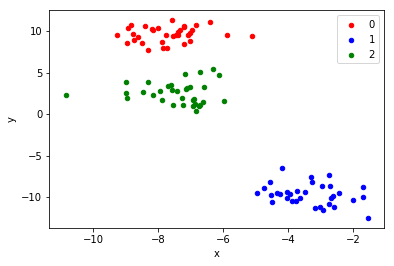

In [14]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=3, n_features=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

### Moons Classification Problem
The make_moons() function is for binary classification and will generate a swirl pattern, or two moons. This test problem is suitable for algorithms that are capable of learning nonlinear class boundaries. The example below generates a moon dataset with moderate noise.

In [ ]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=400, noise=0.1, random_state = 42) #fixed random_state fix the data. 
X= X.T
y= y.reshape(400,1).T
print (X.shape,y.shape)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()
df.head()

### Circles Classification Problem
The make_circles() function generates a binary classification problem with datasets that fall into concentric circles. This test problem is suitable for algorithms that can learn complex non-linear manifolds.

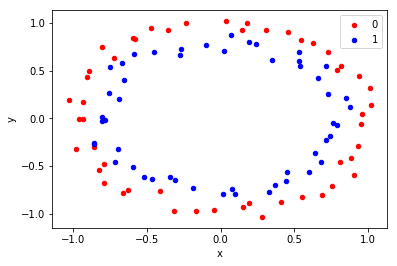

In [14]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.05)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

### Spiral dataset
Lets generate a classification dataset that is not easily linearly separable. Our favorite example is the spiral dataset, which can be generated as follows:

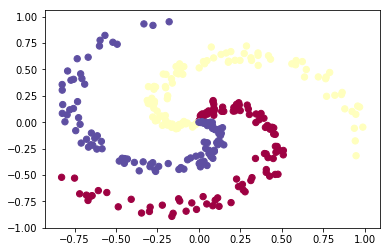

In [15]:
import numpy as np
import matplotlib.pyplot as plt
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()